In [3]:
#!pip install wordcloud


In [73]:
import pandas as pd
import numpy as np
import nltk #cleaning Data
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [9]:
df=pd.read_csv('blogs.csv', encoding='latin-1')

In [10]:
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
df

Data  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [13]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

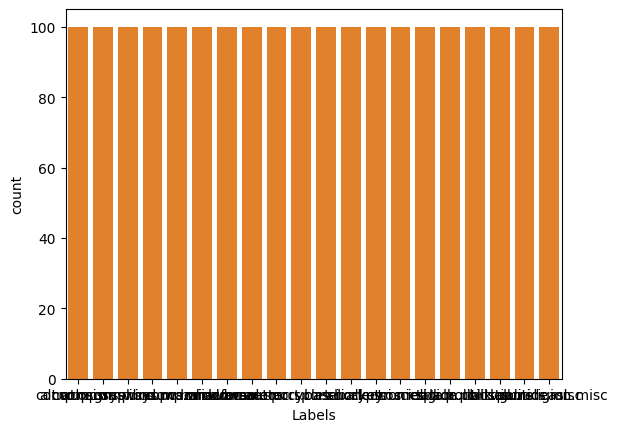

In [15]:
sns.countplot(x=df['Labels'])
plt.show()

In [16]:
df['Labels'].nunique()

20

In [17]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

In [18]:
df.describe()

Data  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [21]:
#Label encoder
# Initialize LabelEncoder
encoder = LabelEncoder()
# Fit and transform the Labels column
df['LabelEncoded'] = encoder.fit_transform(df['Labels'])
df

Data  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [22]:
df['LabelEncoded'].value_counts()

0     100
1     100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
2     100
19    100
Name: LabelEncoded, dtype: int64

In [51]:
def worldCloud(data, heading):
    # Use the correct text column name here
    print(heading)
    txt = ' '.join(data['Data'])  
    wc = WordCloud(
        background_color='white',
        width=700,
        height=200,
        colormap='viridis'
    ).generate(txt)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(heading)
    plt.show()


In [37]:
#df['Labels'][0]
#df['Labels'].nunique()
df_New= df[df['Labels']==df['Labels'][0]]
df_New

Data  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [50]:
 range(0, df['Labels'].nunique())

range(0, 20)

alt.atheism
alt.atheism


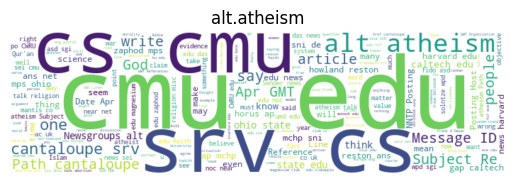

comp.graphics
comp.graphics


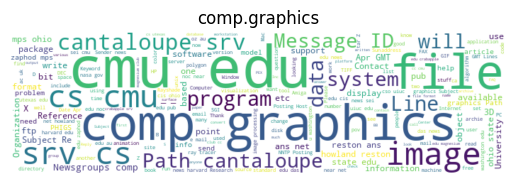

comp.os.ms-windows.misc
comp.os.ms-windows.misc


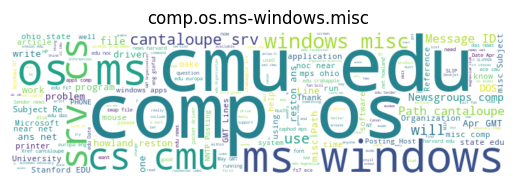

comp.sys.ibm.pc.hardware
comp.sys.ibm.pc.hardware


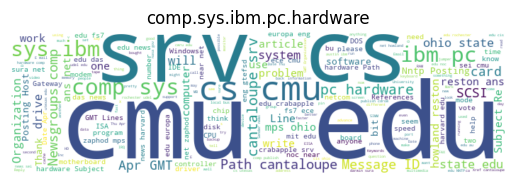

comp.sys.mac.hardware
comp.sys.mac.hardware


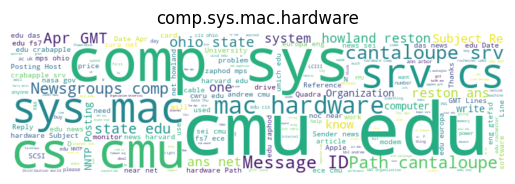

comp.windows.x
comp.windows.x


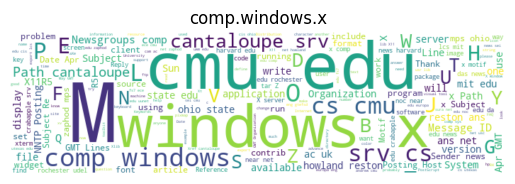

misc.forsale
misc.forsale


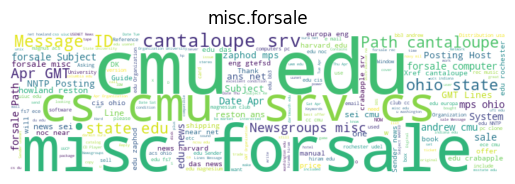

rec.autos
rec.autos


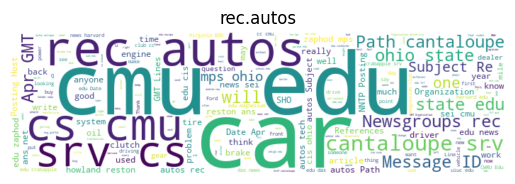

rec.motorcycles
rec.motorcycles


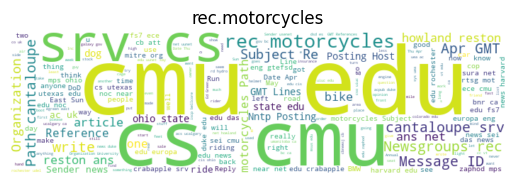

rec.sport.baseball
rec.sport.baseball


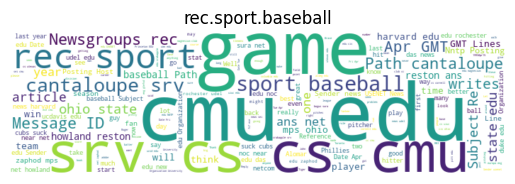

rec.sport.hockey
rec.sport.hockey


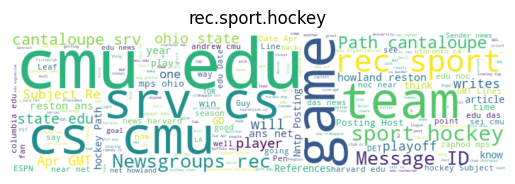

sci.crypt
sci.crypt


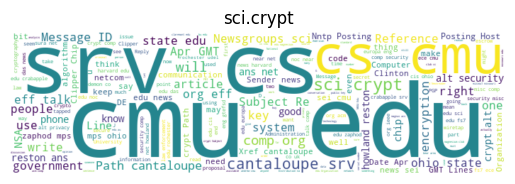

sci.electronics
sci.electronics


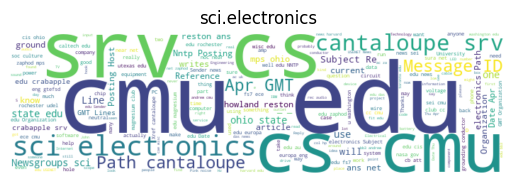

sci.med
sci.med


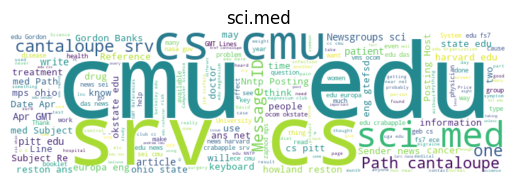

sci.space
sci.space


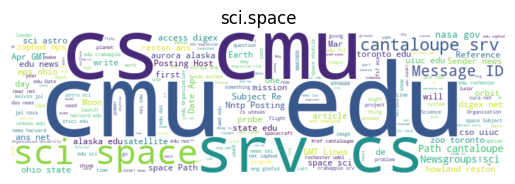

soc.religion.christian
soc.religion.christian


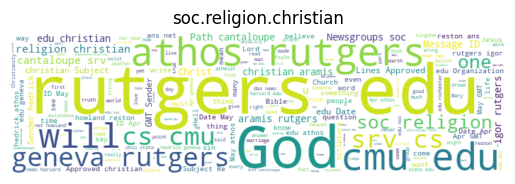

talk.politics.guns
talk.politics.guns


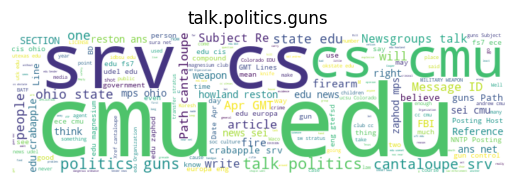

talk.politics.mideast
talk.politics.mideast


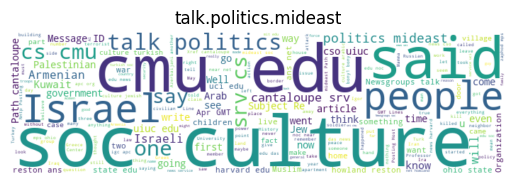

talk.politics.misc
talk.politics.misc


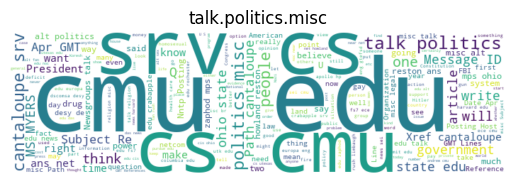

talk.religion.misc
talk.religion.misc


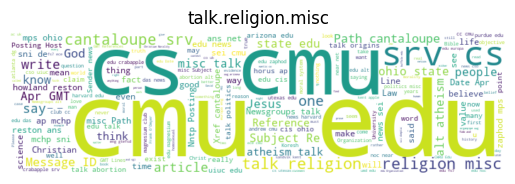

In [57]:
#df_New=[]
for head in df['Labels'].unique():
    print(head)
    df_New=df[df['Labels']==head]
    #print('--------------')
    #df_New
    worldCloud(df_New,head)

In [59]:
lemma = WordNetLemmatizer()

In [65]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HSRIT\AppData\Roaming\nltk_data...


True

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HSRIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [66]:
corpus=[]
for i in range(len(df)):
    msg=re.sub('[^a-zA-Z]',' ', df['Data'][i])
    msg=msg.lower() #normalization
    msg=msg.split() #word tokenize
    msg = [lemma.lemmatize(word) for word in msg if word not in stopwords.words('english')]
    corpus.append(' '.join(msg))  # join back into a cleaned string

    #list comprehension
    
    

In [67]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

In [70]:
# Model building
y=df['Labels']
tf=TfidfVectorizer()
x_data=tf.fit_transform(corpus)

In [71]:
x_data=x_data.toarray()


In [72]:
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y,test_size=0.2,random_state=1)

In [75]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)
print(f"TrainAccuracy:{nb.score(xtrain,ytrain)} \n TestAccuracy:{nb.score(xtest,ytest)}")

TrainAccuracy:0.985625 
 TestAccuracy:0.82
